In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("CoffeeRatings.csv", delimiter= ";")
df

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green
...,...,...,...,...,...,...,...,...,...,...,...
830,758,70,675,692,70,692,100,100,11,7917,Green
831,758,767,742,742,767,767,867,867,1,7908,Green
832,0,0,0,0,0,0,0,0,12,0,Green
833,767,775,783,767,792,783,100,792,1,825,Bluish-Green


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    int64 
 1   Scores_Flavor      835 non-null    int64 
 2   Scores_Aftertaste  835 non-null    int64 
 3   Scores_Acidity     835 non-null    int64 
 4   Scores_Body        835 non-null    int64 
 5   Scores_Balance     835 non-null    int64 
 6   Scores_Uniformity  835 non-null    int64 
 7   Scores_Sweetness   835 non-null    int64 
 8   Scores_Moisture    835 non-null    int64 
 9   Scores_Total       835 non-null    int64 
 10  Color              835 non-null    object
dtypes: int64(10), object(1)
memory usage: 71.9+ KB


In [6]:
df["Color"].unique()

array(['Green', 'Blue-Green', 'Bluish-Green'], dtype=object)

In [14]:
# colors = {
#     'Green': '#A8A77A',
#     'Blue-Green': '#EE8130',
#     'Bluish-Green': '#6390F0',
# }


colors = {
    'Green': 'forestgreen',
    'Blue-Green': 'aqua',
    'Bluish-Green': 'teal',
}

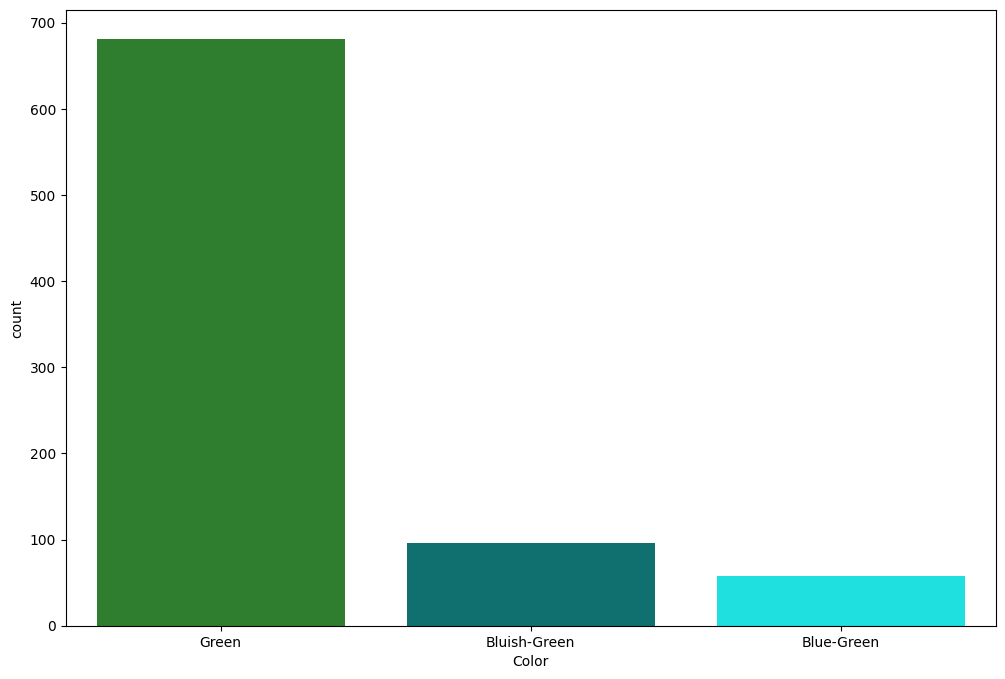

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Color', data=df, palette=colors, order=df['Color'].value_counts().index)
# plt.xticks(rotation=-45)
plt.show()

In [28]:
def global_boxplots(df):
    # Asegúrate de que todas las columnas sean numéricas
    columnas_numericas = df.drop('Color',axis=1).select_dtypes(include=['number'])
    
    if columnas_numericas.empty:
        print("No hay columnas numéricas en el DataFrame.")
        return
    
    # Normalizar las columnas numéricas
    scaler = StandardScaler()
    columnas_numericas_normalized = pd.DataFrame(scaler.fit_transform(columnas_numericas), columns=columnas_numericas.columns)
    
    # Crear una lista de títulos de columnas rotados
    column_titles = [col for col in columnas_numericas_normalized.columns]
    # column_titles = [col for col in columnas_numericas.columns]

    # Graficar los boxplots de las columnas numéricas normalizadas con rango en el eje Y de -4 a 4
    plt.figure(figsize=(20, 10))
    plt.title("Boxplots para todas las variables")
    boxplot = plt.boxplot(columnas_numericas_normalized.values, vert=True)
    # boxplot = plt.boxplot(columnas_numericas.values, vert=True)

    # Rotar los títulos de las columnas
    plt.xticks(range(1, len(columnas_numericas_normalized.columns) + 1), column_titles, rotation=90)
    # plt.xticks(range(1, len(columnas_numericas.columns) + 1), column_titles, rotation=90)

    plt.xlabel("Variables")
    plt.ylabel("Valores Normalizados")
    # plt.ylim(-4, 4)  # Establecer el rango en el eje Y
    plt.show()

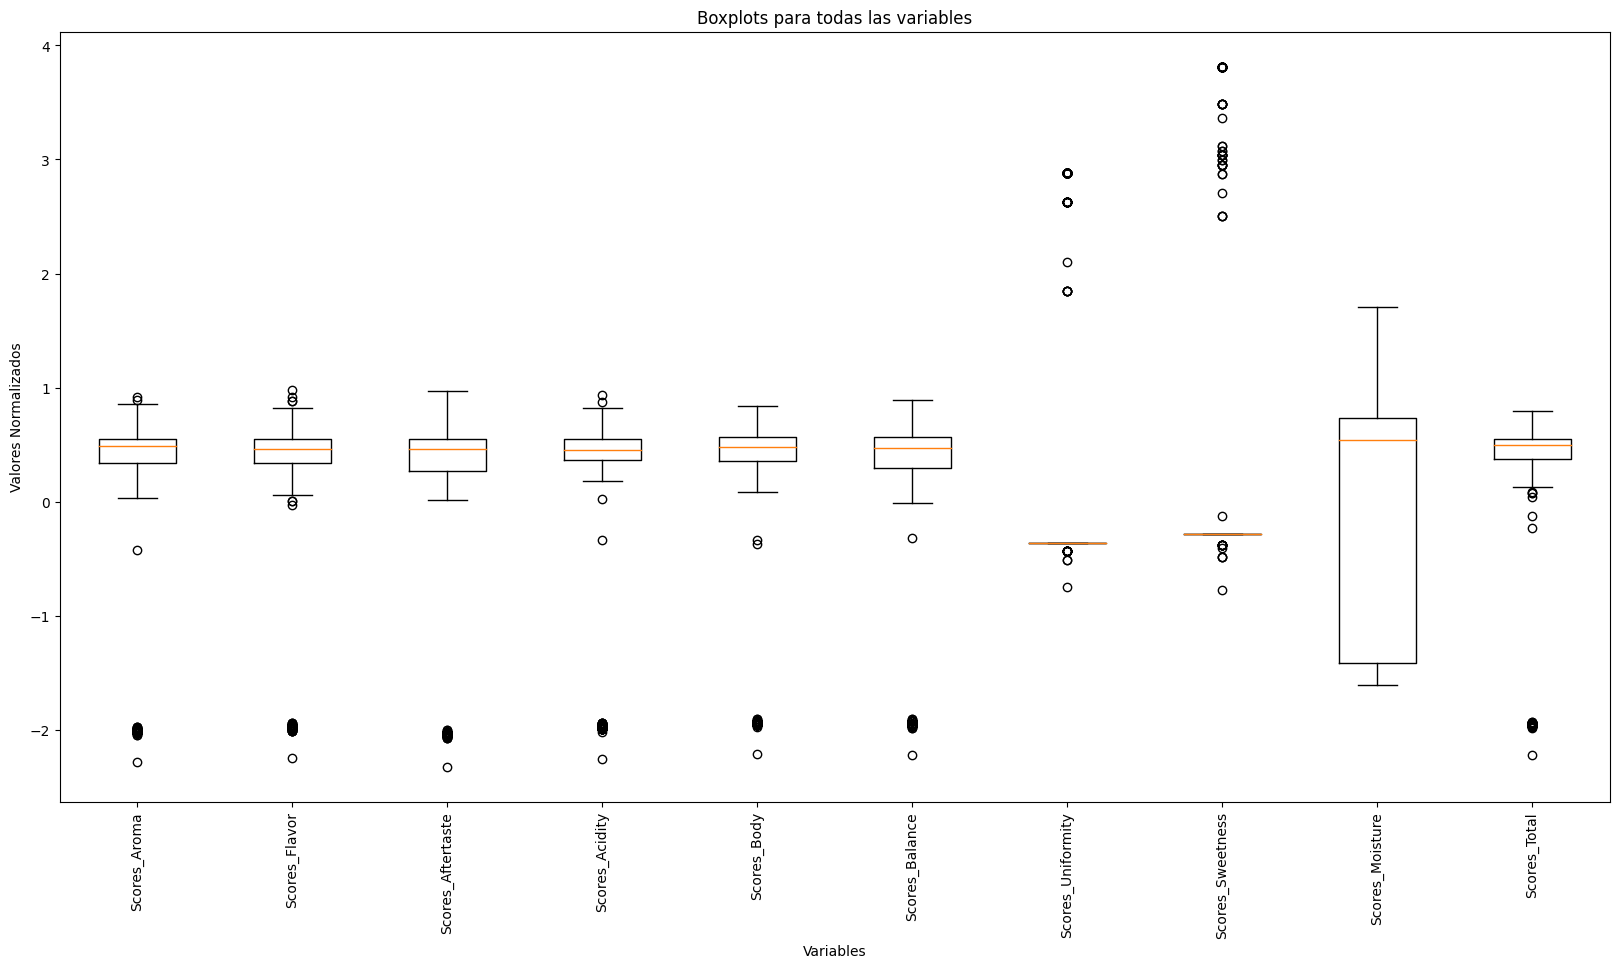

In [29]:
global_boxplots(df)

In [26]:
def boxplots(df, x, y):
    plt.figure(figsize=(15,10))
    sns.boxplot(x=x, y=y, data=df, palette=colors)
    # plt.xticks(rotation=90)
    plt.show()

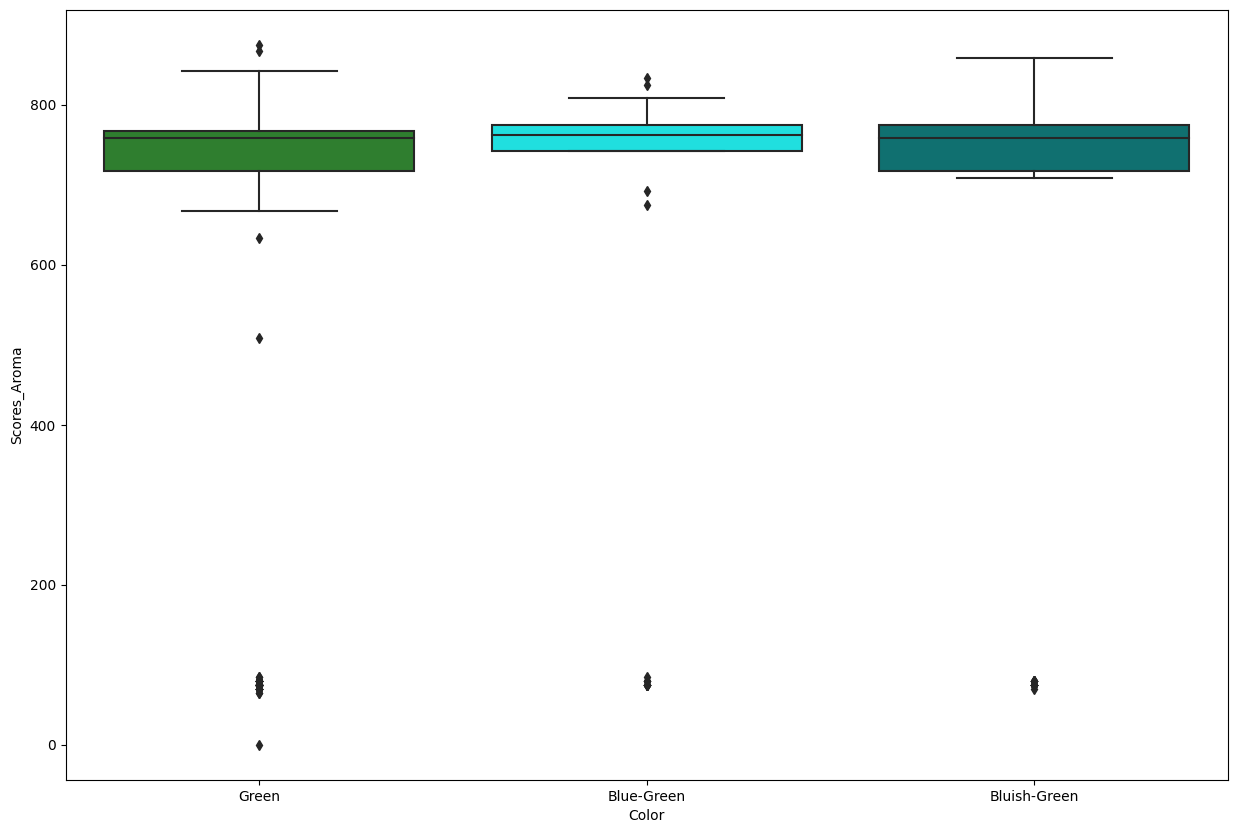

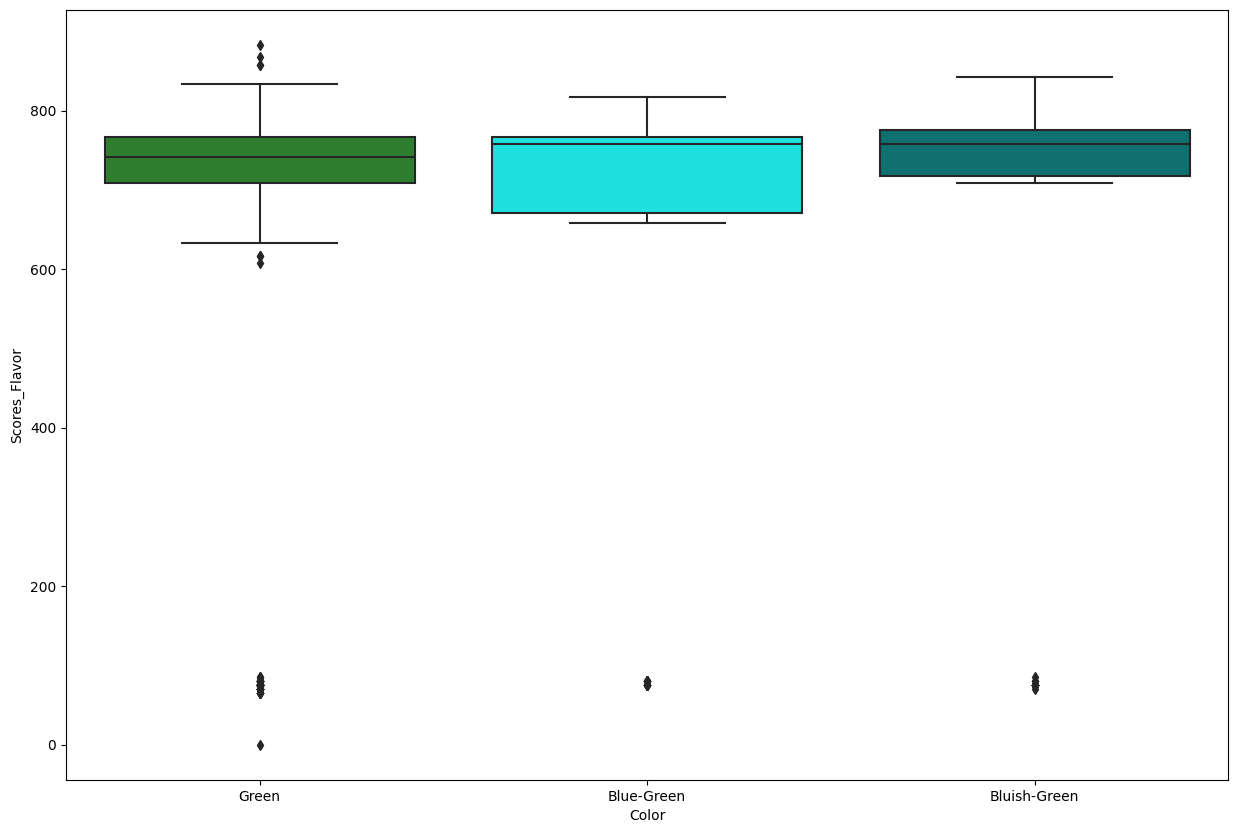

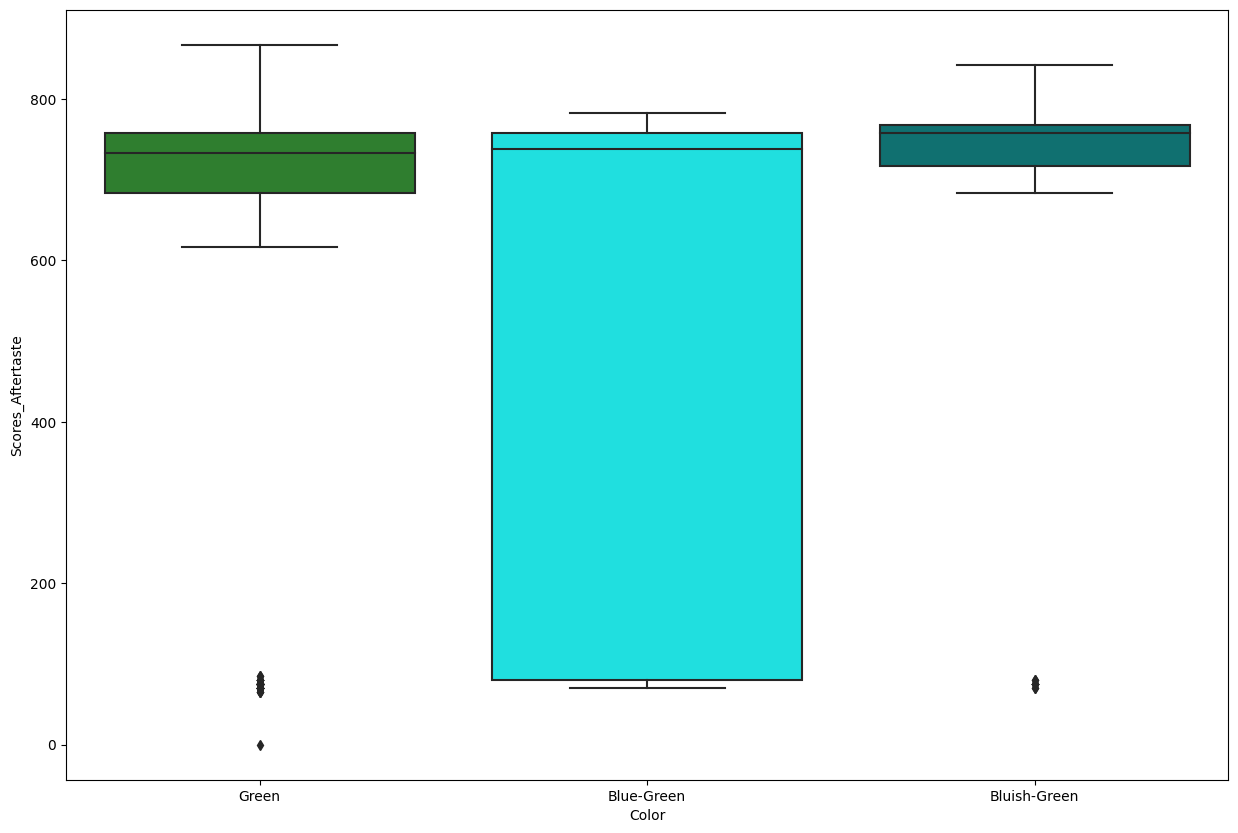

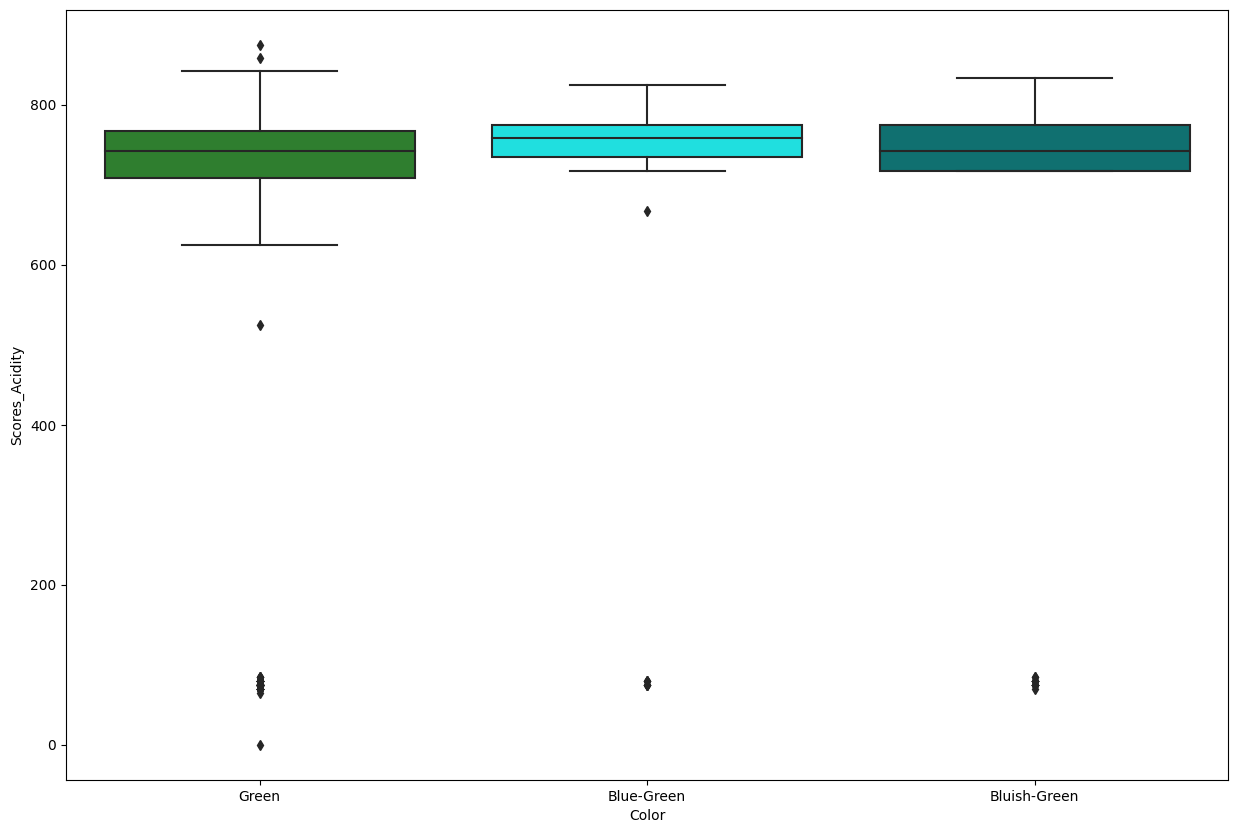

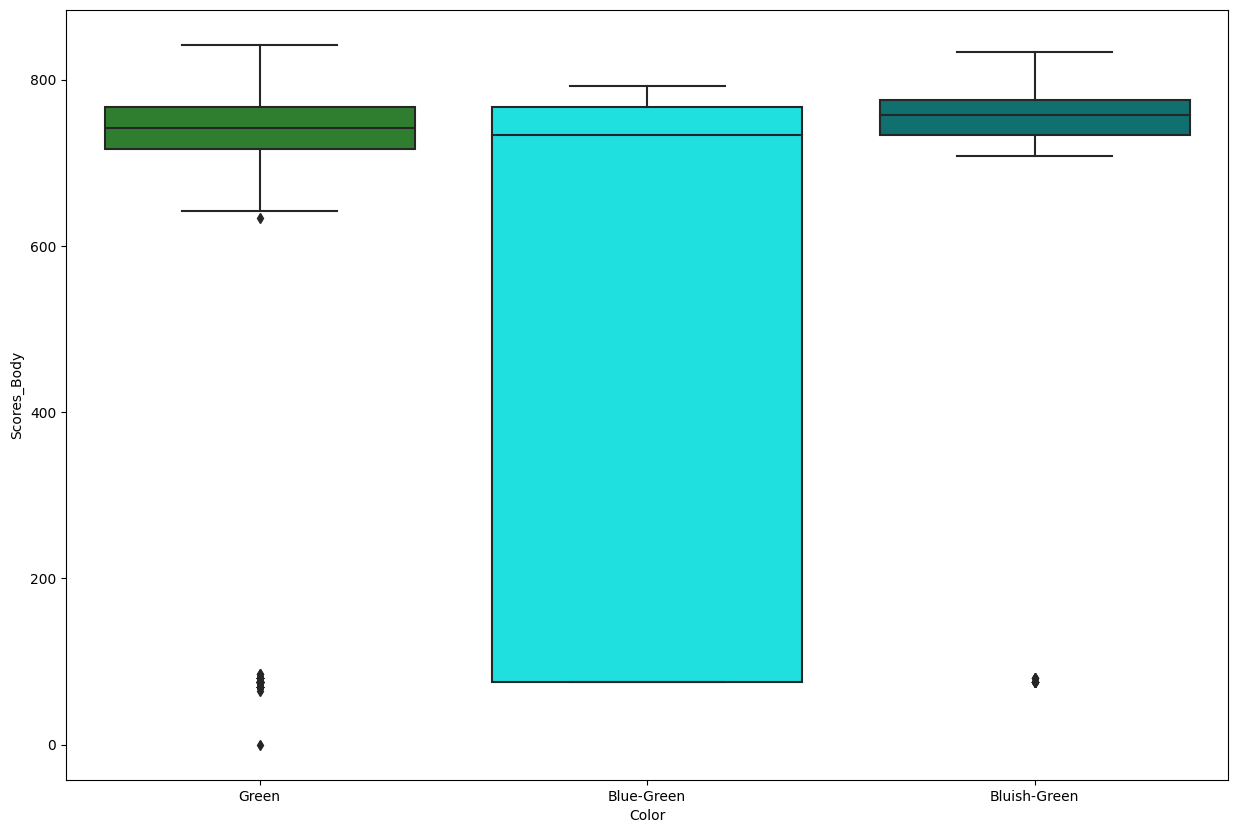

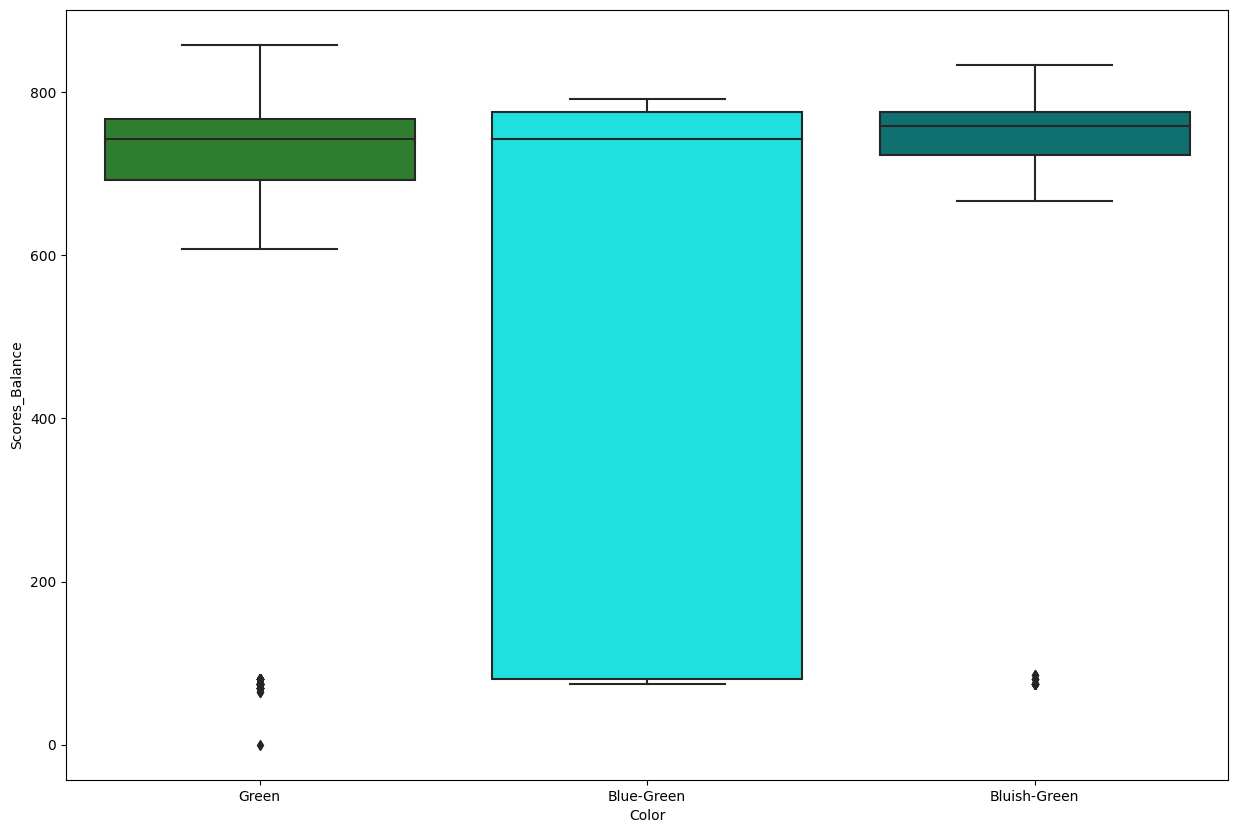

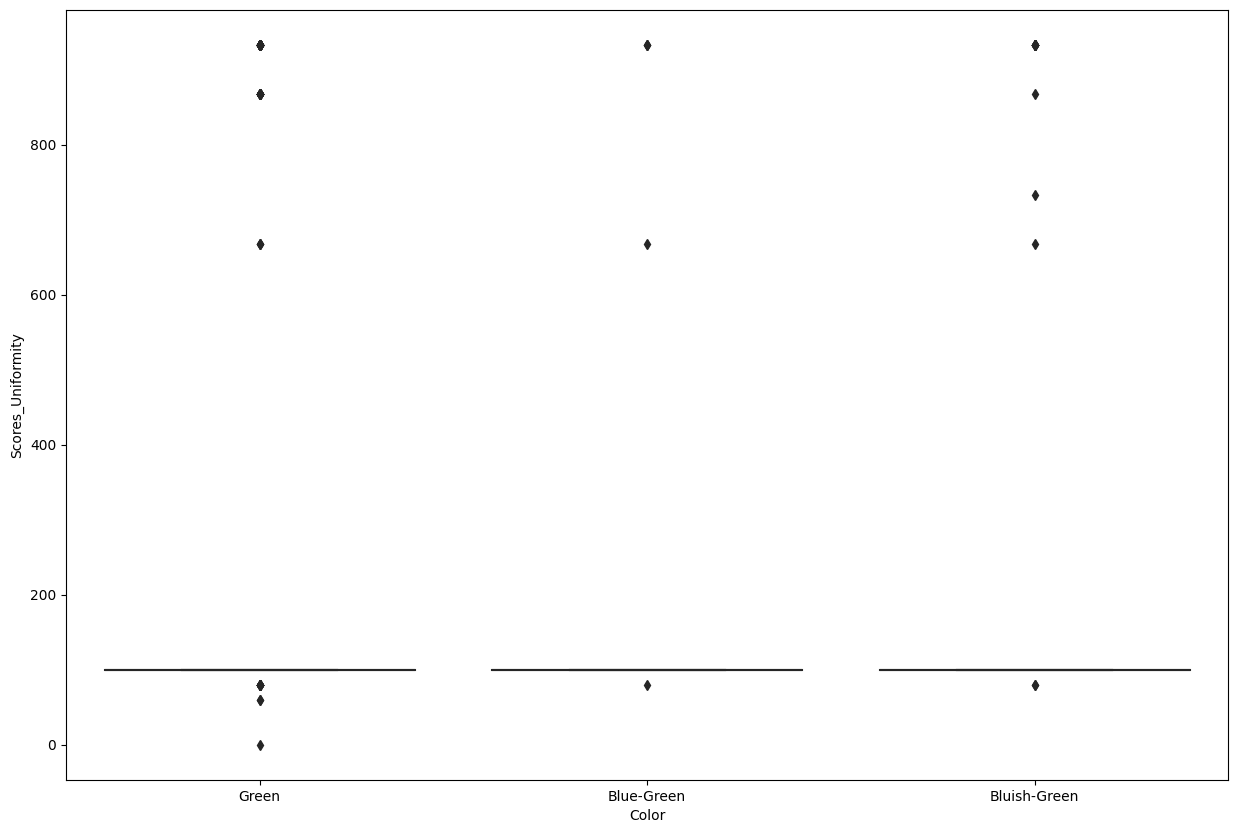

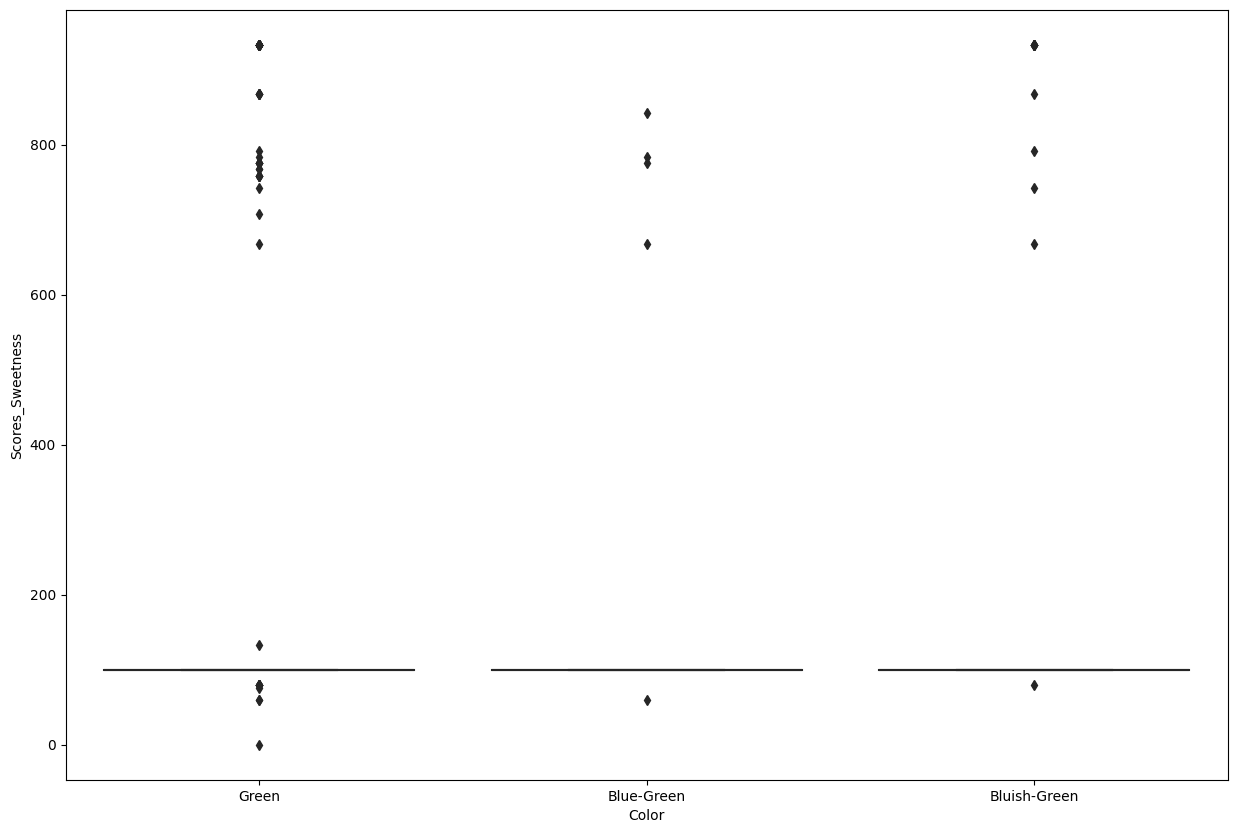

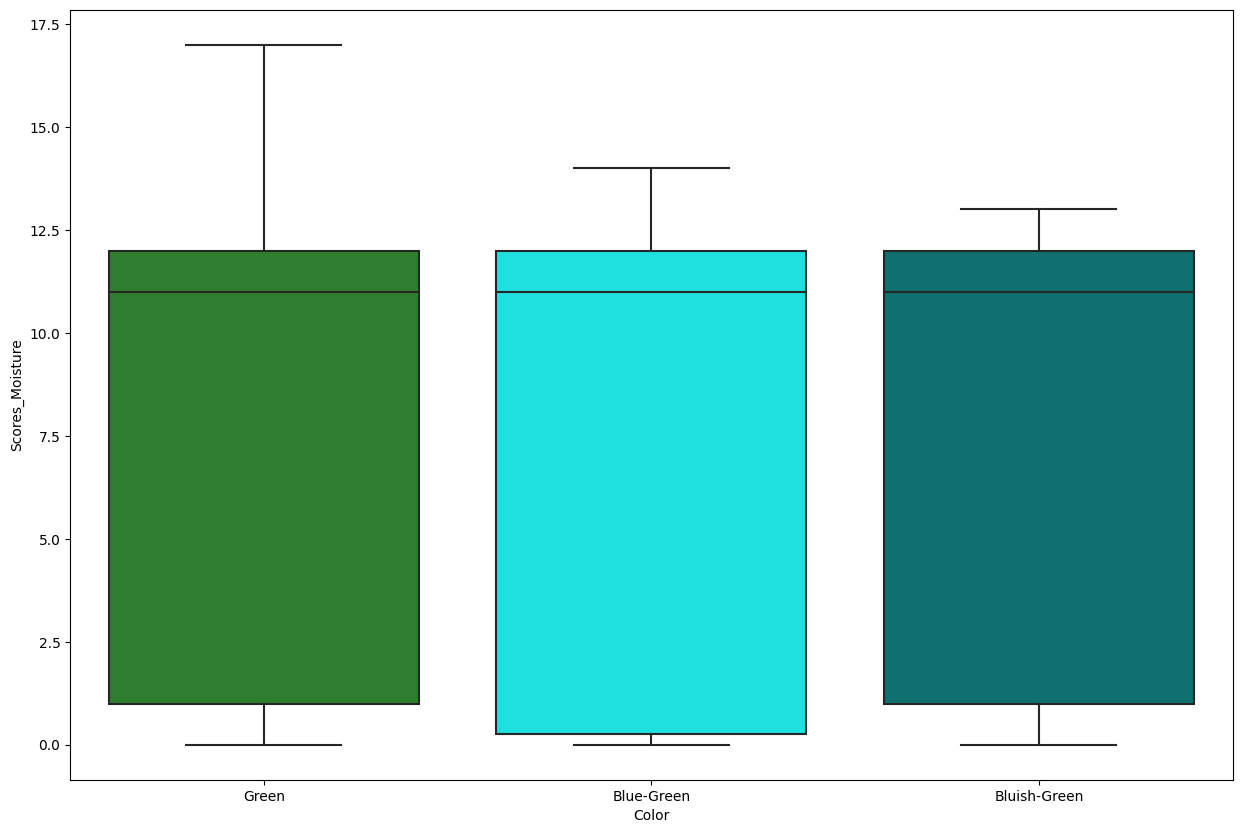

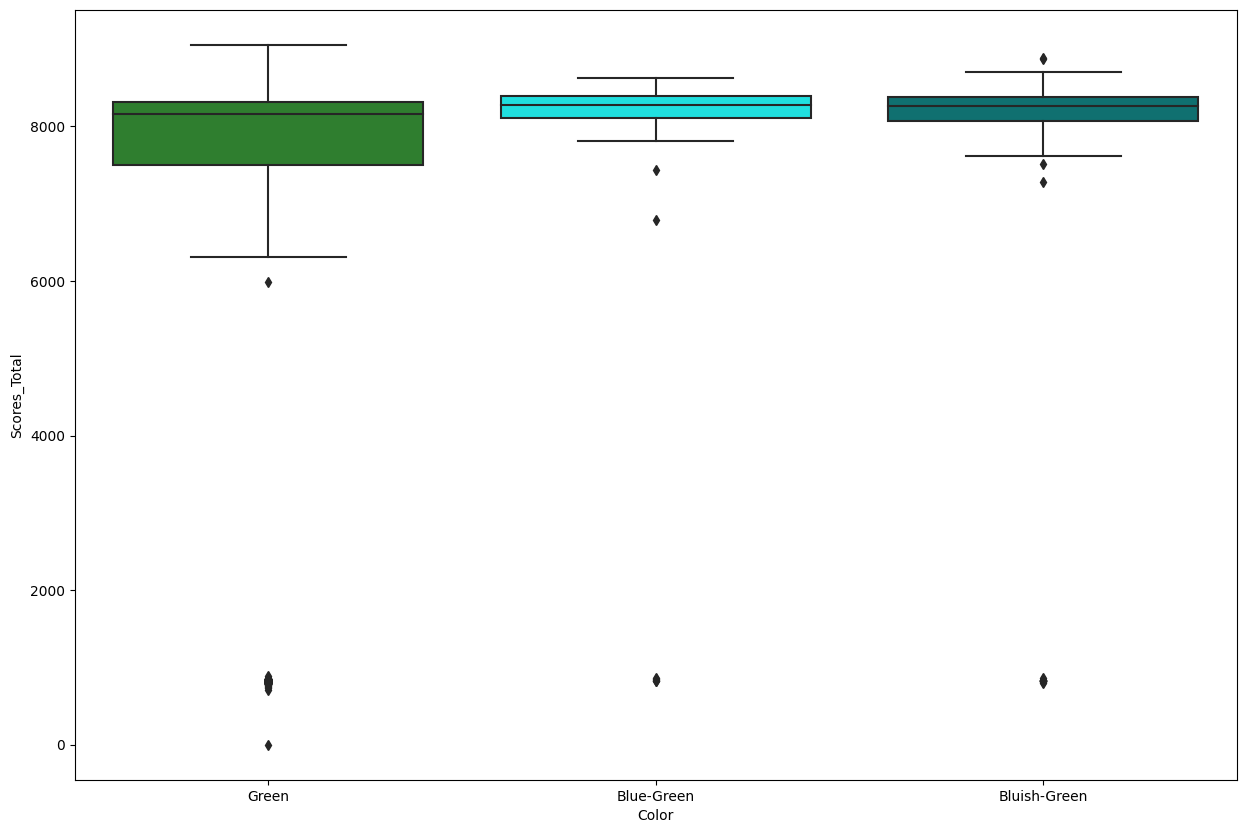

In [27]:
for column in df.drop("Color", axis=1).columns:
    boxplots(df, "Color", column)

In [24]:
# vamos a eliminar los outliers?
# def remove_outliers(df, column_name):
#     """
#     Elimina los outliers de una columna específica en un DataFrame.

#     Parameters:
#     - df: DataFrame
#     - column_name: str, nombre de la columna con outliers

#     Returns:
#     - DataFrame sin outliers
#     """
#     # Calcula el rango intercuartílico (IQR)
#     Q1 = df[column_name].quantile(0.25)
#     Q3 = df[column_name].quantile(0.75)
#     IQR = Q3 - Q1

#     # Definir límites para identificar outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Filtra los datos para eliminar outliers
#     df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

#     return df

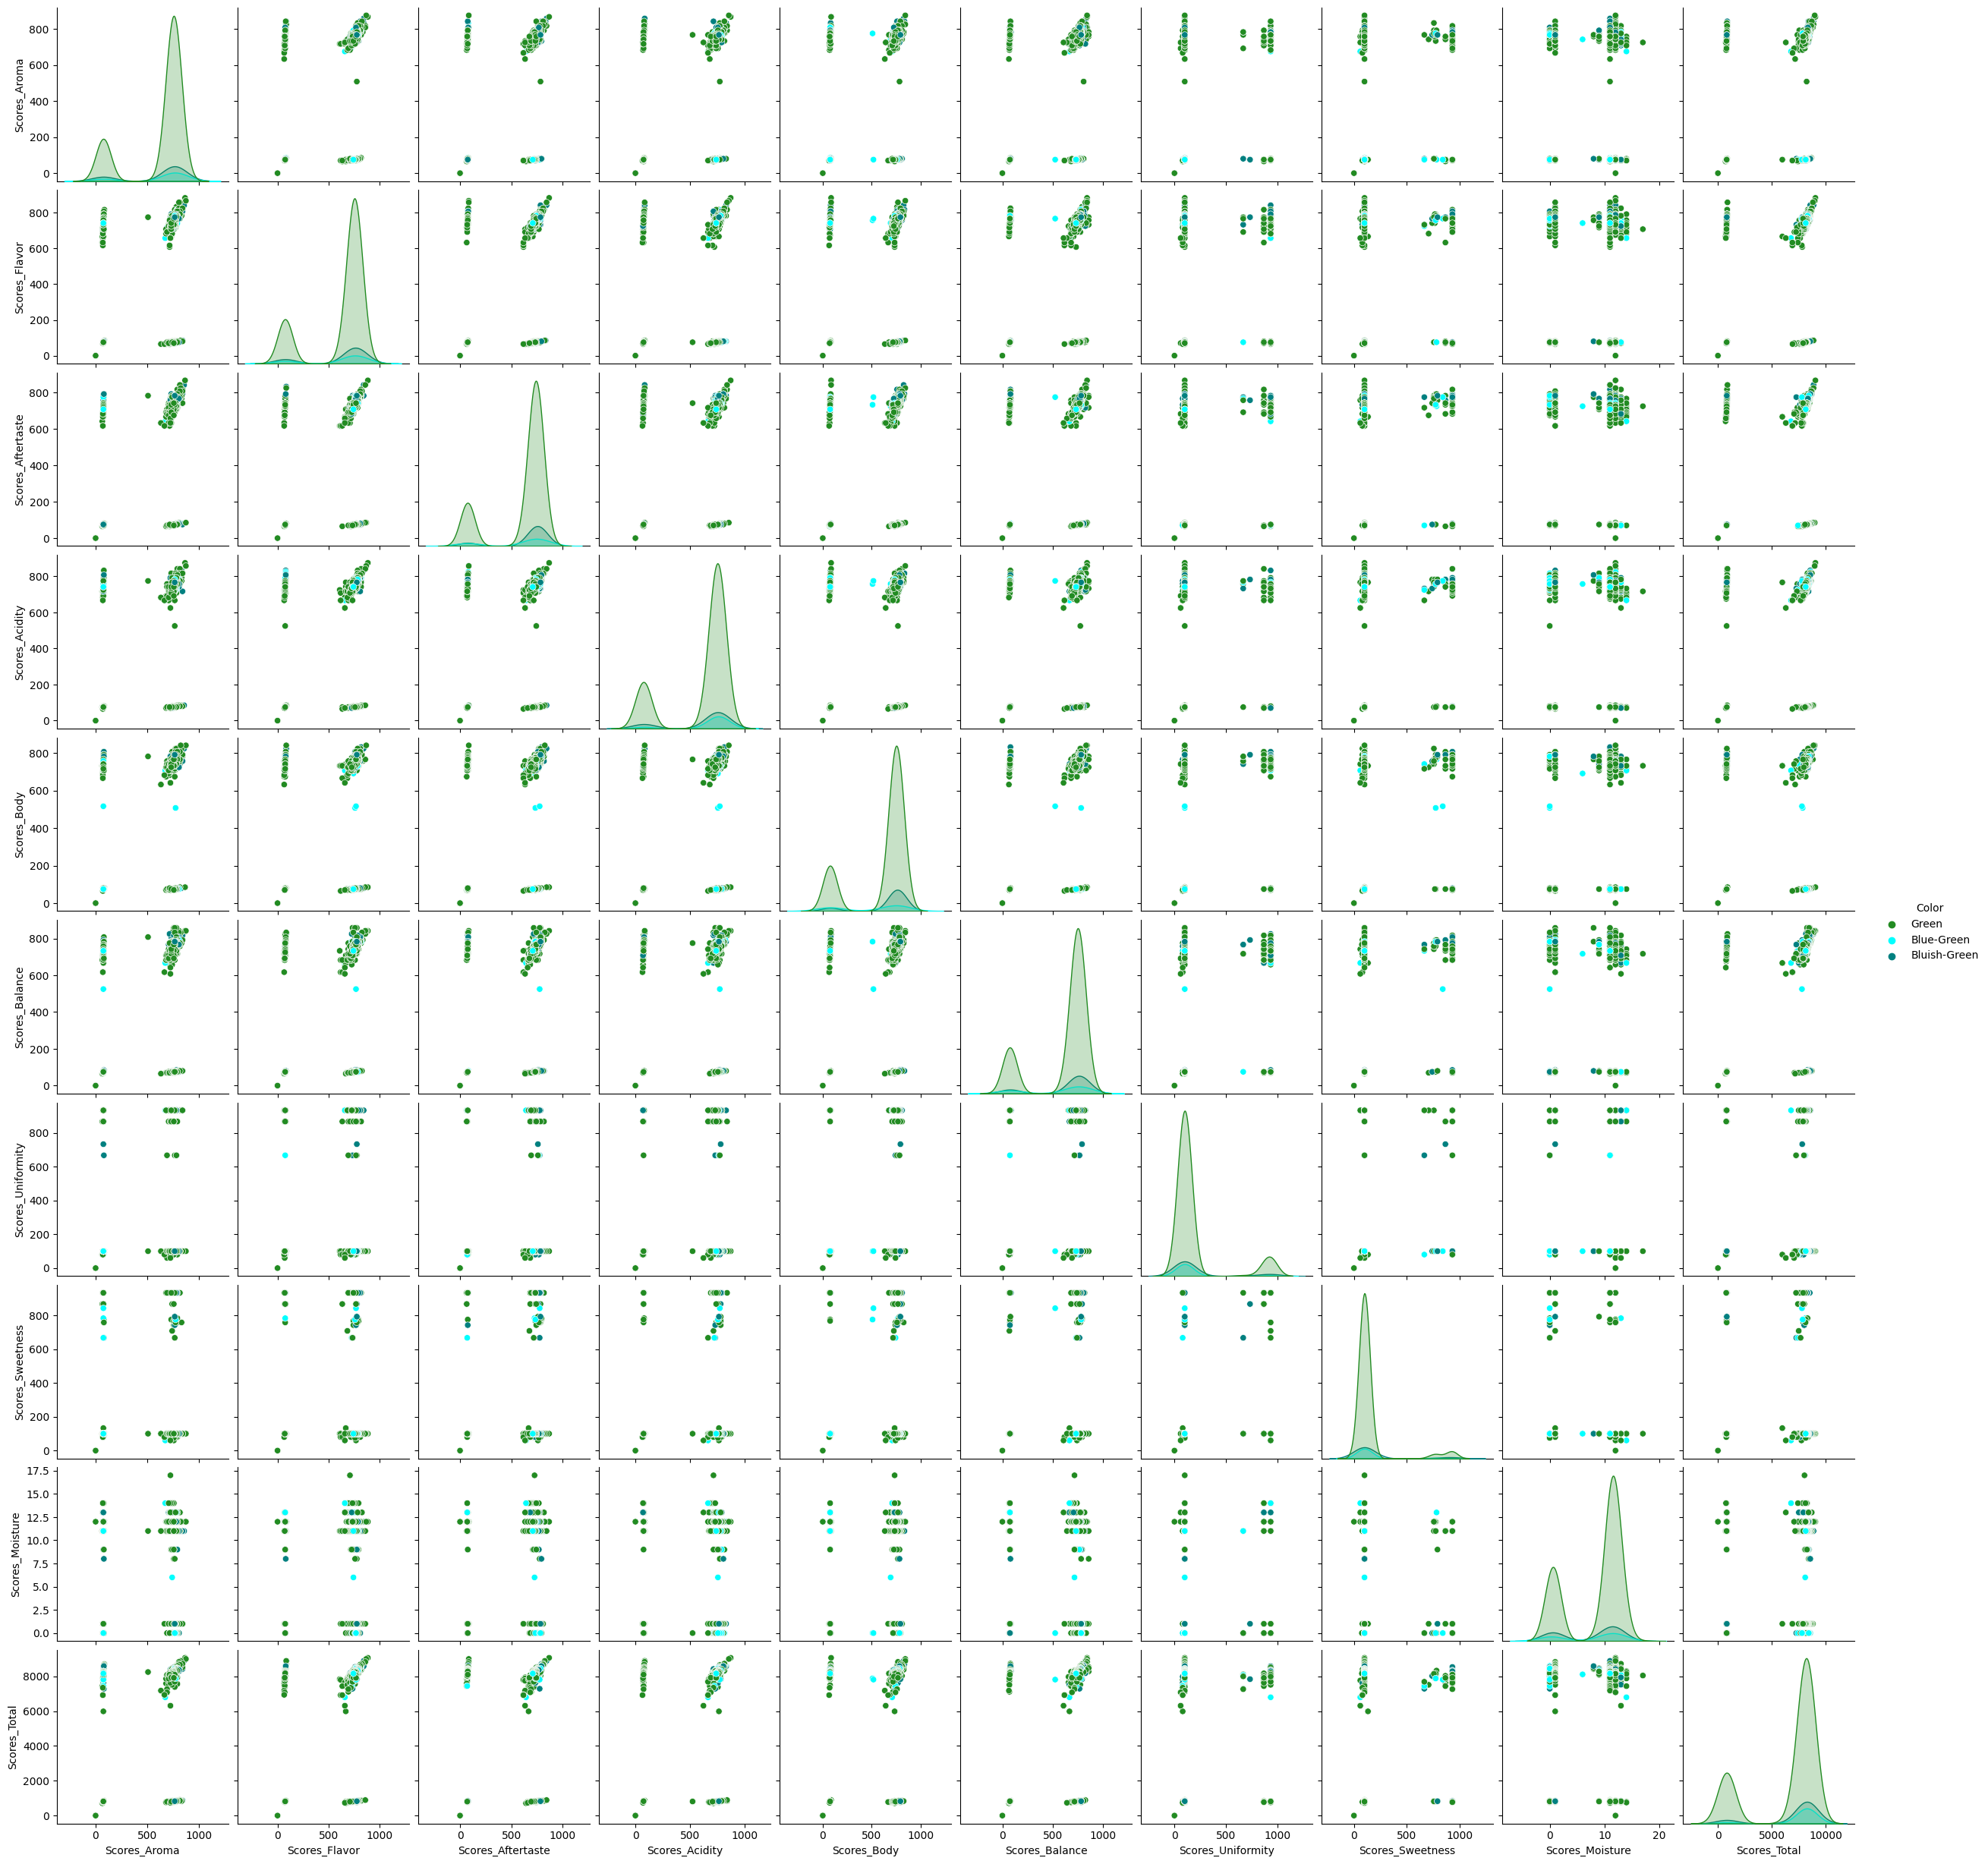

In [25]:
#Buscar otro grafico para ver como se comporta la variable
sns.pairplot(df, hue="Color", palette=colors)

## SVM - KERNEL LINEAL

## SVM - KERNEL GAUSSIANO

## RANDOM FOREST